# Problem Statement:
# A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
# Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree


import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_csv("/content/Company_Data (1).csv")

In [3]:
Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
Data1 = Data.copy()

In [5]:
Data1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
Data1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
Data1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

# EDA

<Axes: >

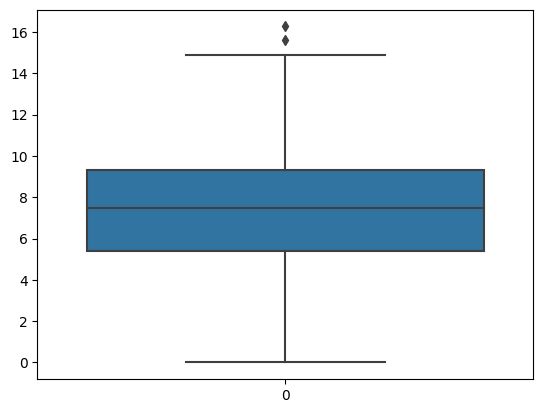

In [8]:
sns.boxplot(Data1['Sales'])

There are 2 outliers in this dataset

In [9]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


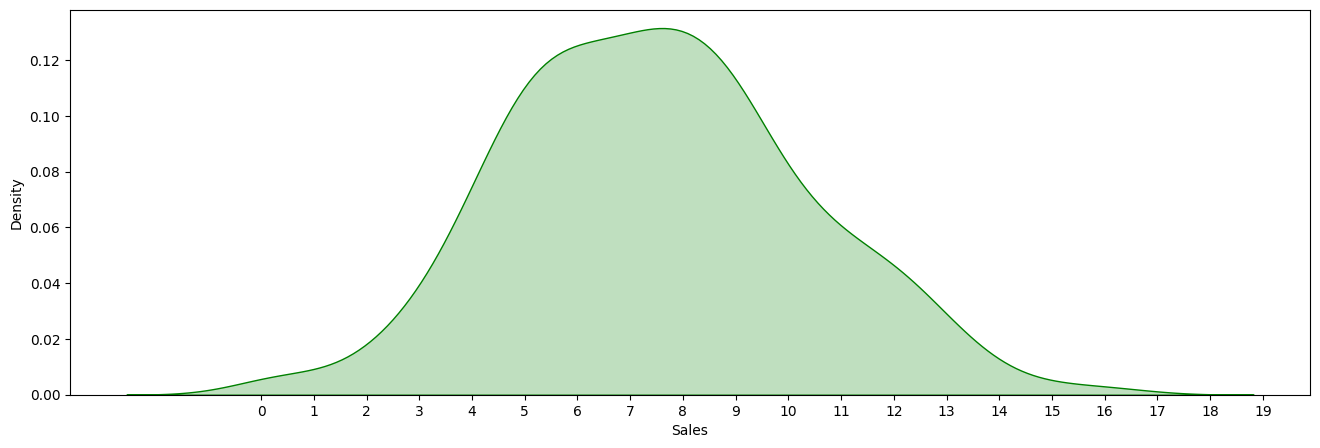

In [10]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(Data1['Sales'].skew()))
print("Kurtosis: {}".format(Data1['Sales'].kurtosis()))
ax = sns.kdeplot(Data1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

Data is skewed right side indicates negative kurtosis

In [11]:
obj = Data1.select_dtypes(include='object').columns.tolist()

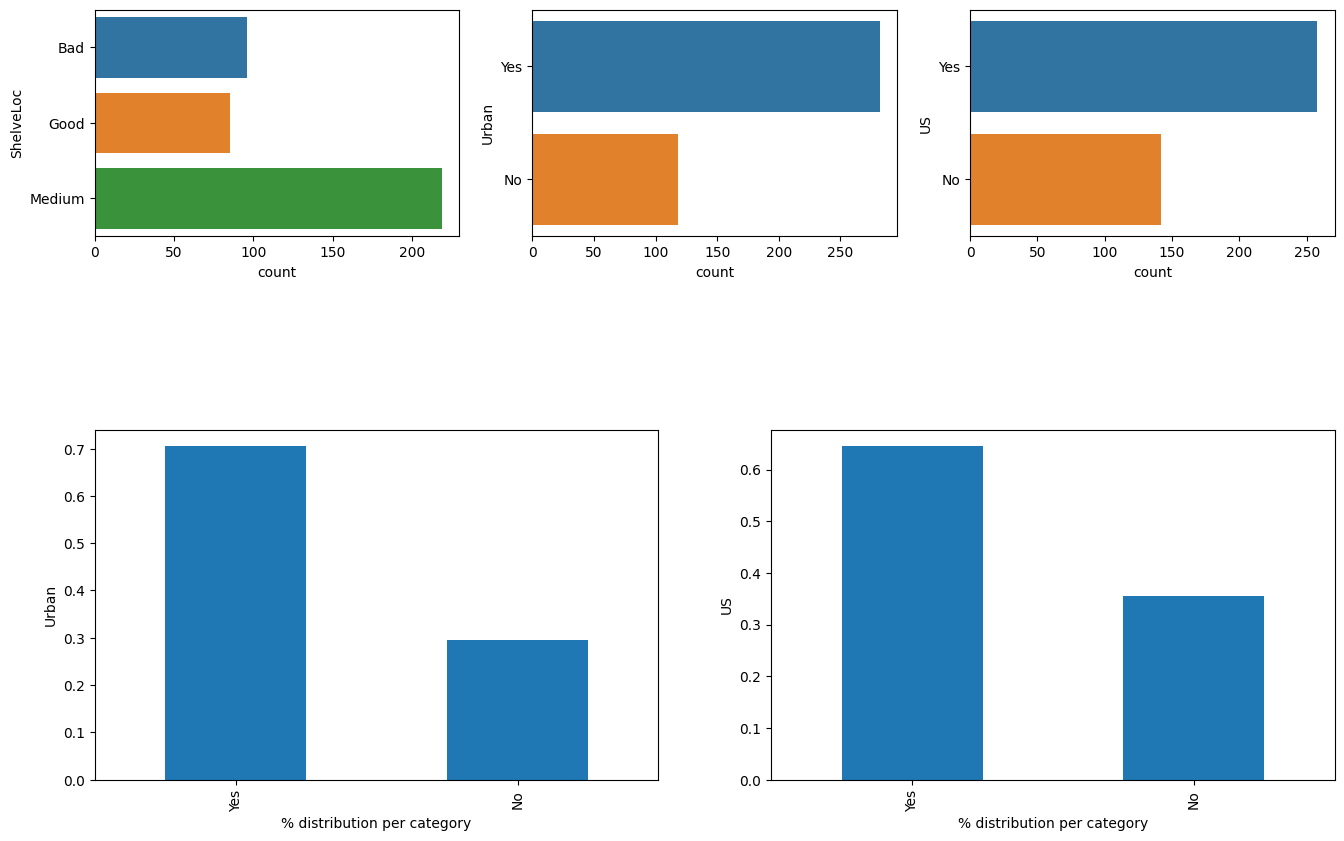

In [12]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj,1):
    plt.subplot(3,3,i)
    sns.countplot(data=Data1,y=col)
    plt.subplot(2,2,i+1)
    Data1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [13]:
num = Data1.select_dtypes(exclude='object').columns.tolist()

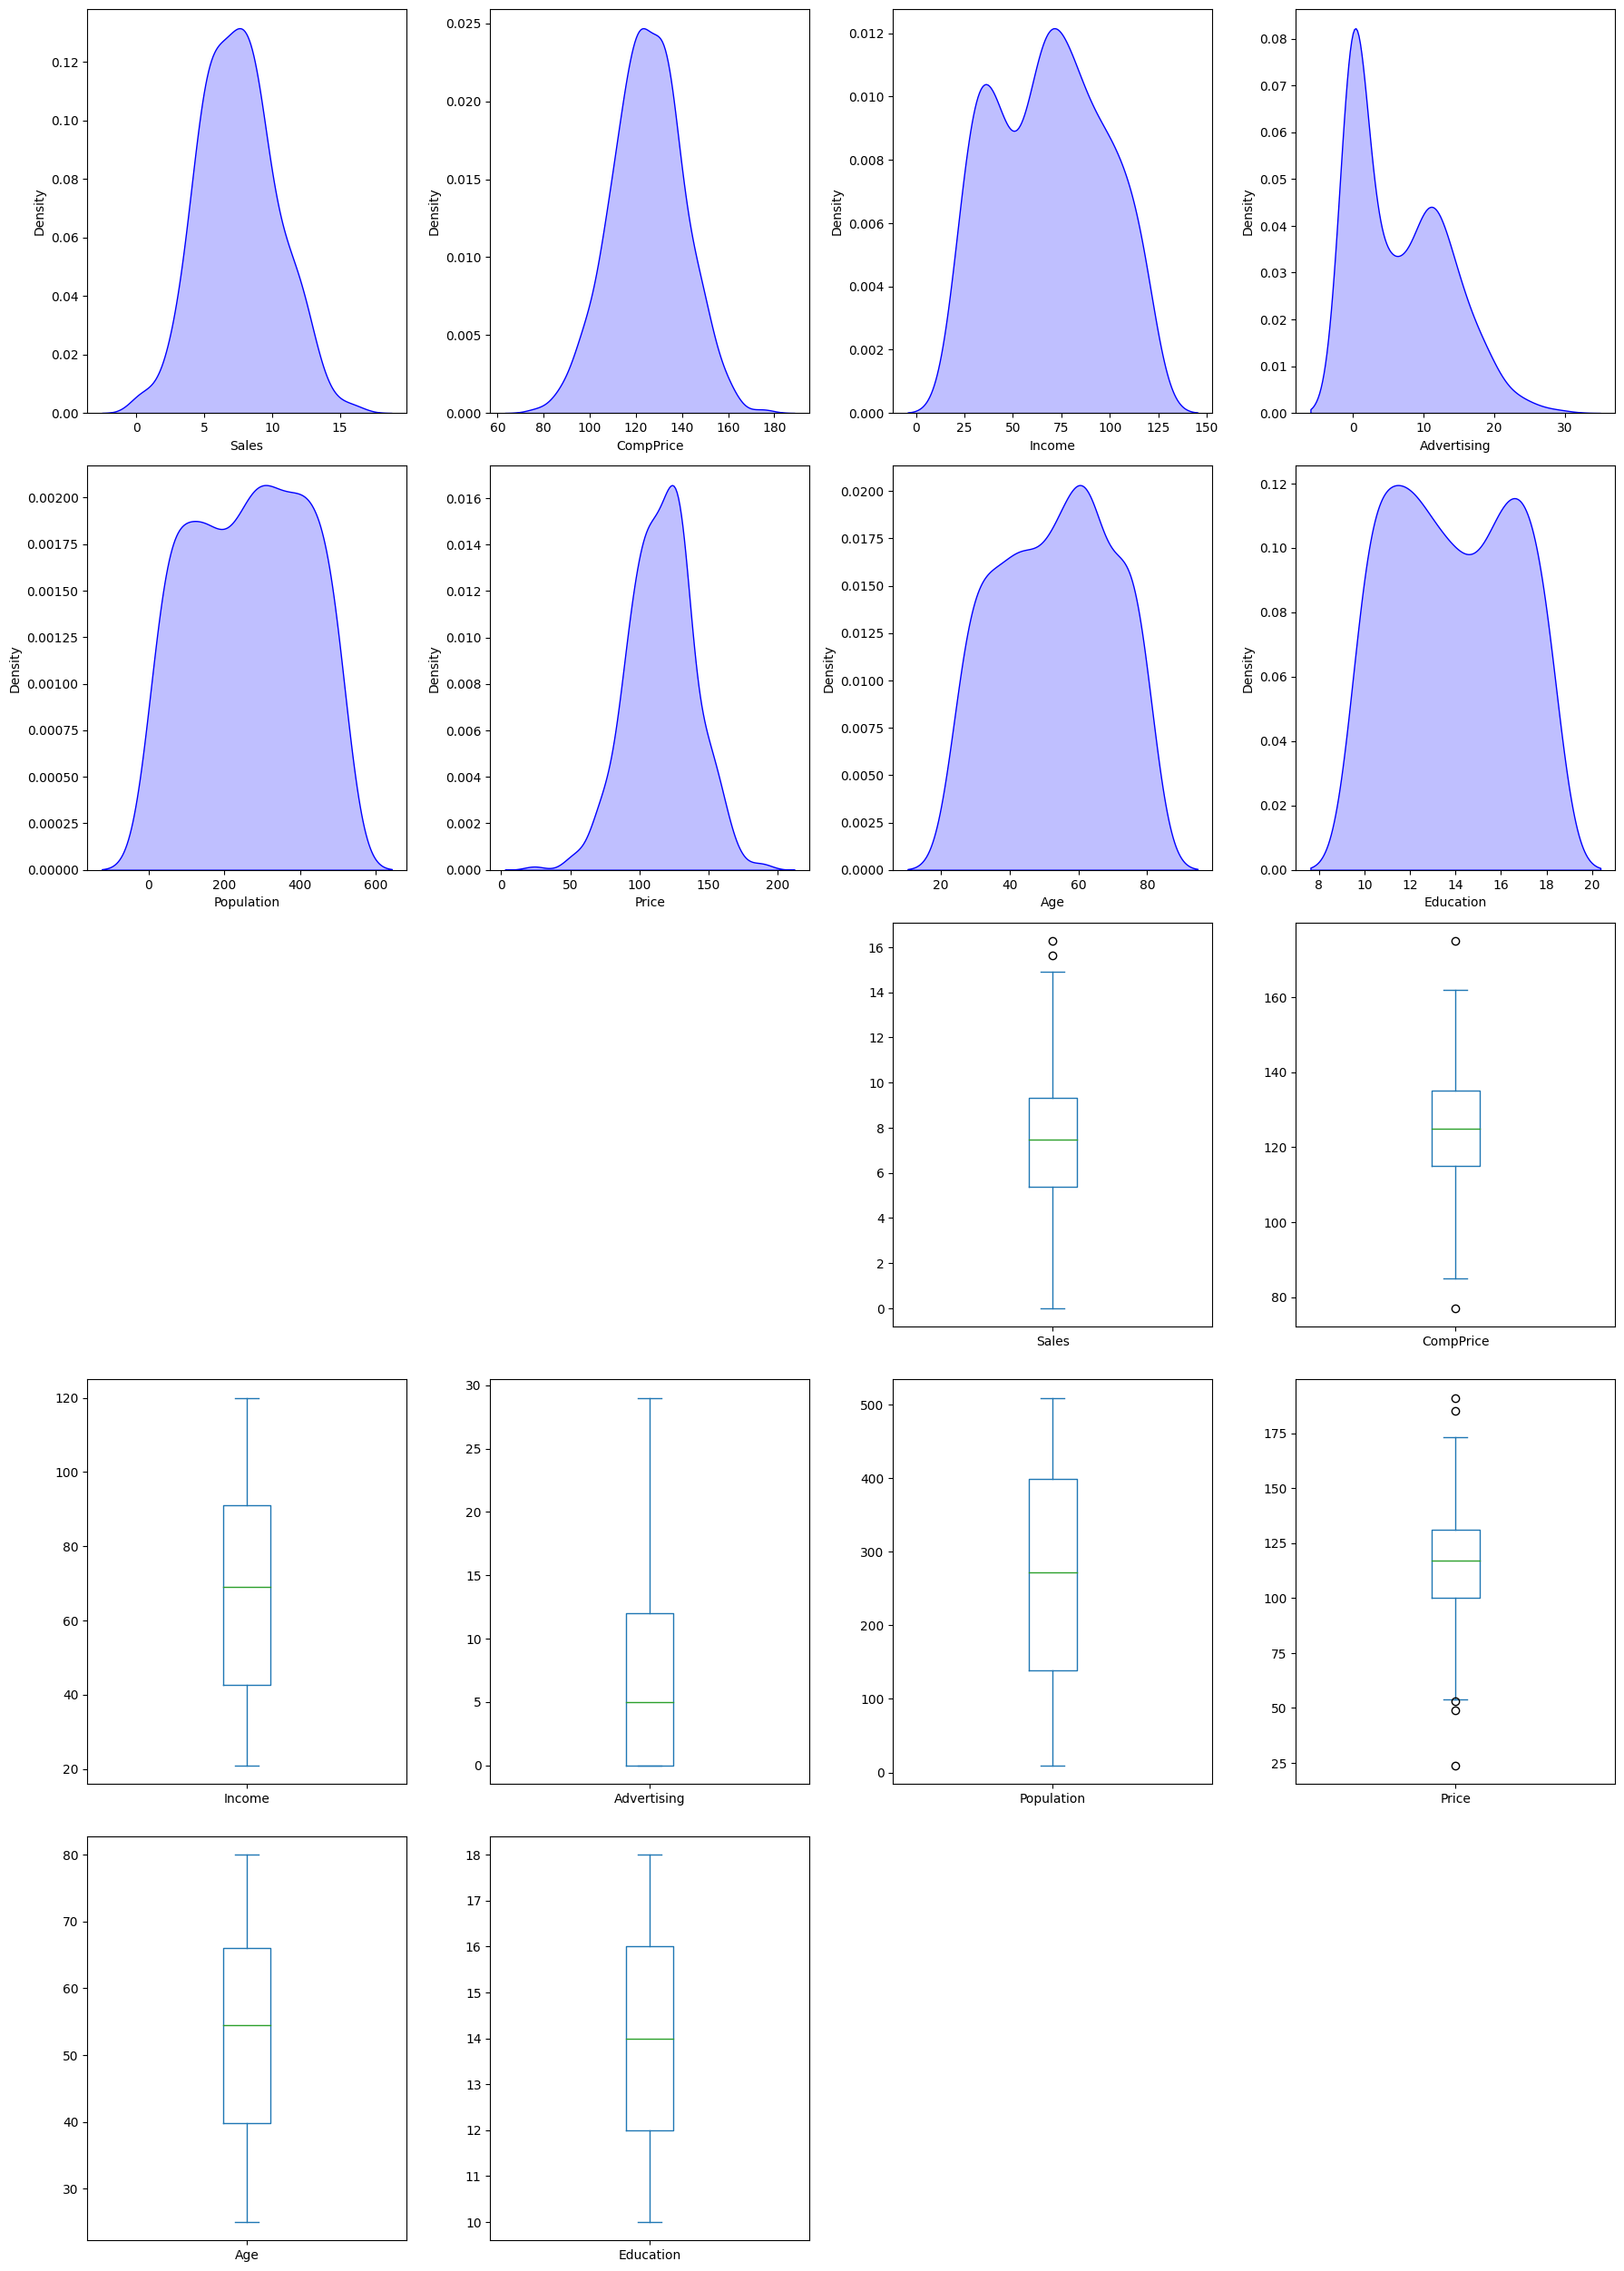

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [14]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num,1):
    plt.subplot(8,4,i)
    sns.kdeplot(Data1[col],color='b',shade=True)
    plt.subplot(8,4,i+10)
    Data1[col].plot.box()
plt.tight_layout()
plt.show()
num_data = Data1[num]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Data1['ShelveLoc']= label_encoder.fit_transform(Data1['ShelveLoc'])
Data1['Urban']= label_encoder.fit_transform(Data1['Urban'])
Data1['US']= label_encoder.fit_transform(Data1['US'])

In [16]:
Data1['High']=Data1.Sales.map(lambda x: 1 if x >7.49 else 0)

In [17]:
Data1.drop('Sales',inplace=True,axis=1)

In [18]:
Data1.rename(columns={'High':'Sales'},inplace=True)

In [19]:
Data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [20]:
#groupby
Data1.groupby(['ShelveLoc','Urban','US']).count()

CompPrice  Income  Advertising  Population  Price  Age  \
ShelveLoc Urban US                                                           
0         0     0          11      11           11          11     11   11   
                1          11      11           11          11     11   11   
          1     0          23      23           23          23     23   23   
                1          51      51           51          51     51   51   
1         0     0           6       6            6           6      6    6   
                1          22      22           22          22     22   22   
          1     0          18      18           18          18     18   18   
                1          39      39           39          39     39   39   
2         0     0          29      29           29          29     29   29   
                1          39      39           39          39     39   39   
          1     0          55      55           55          55     55   55   
                1          96      96           96          96     96   96   

                    Education  Sales  
ShelveLoc Urban US                    
0         0     0          11     11  
                1          11     11  
          1     0          23     23  
                1          51     51  
1         0     0           6      6  
                1          22     22  
          1     0          18     18  
                1          39     39  
2         0     0          29     29  
                1          39     39  
          1     0          55     55  
                1          96     96

In [21]:
Data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


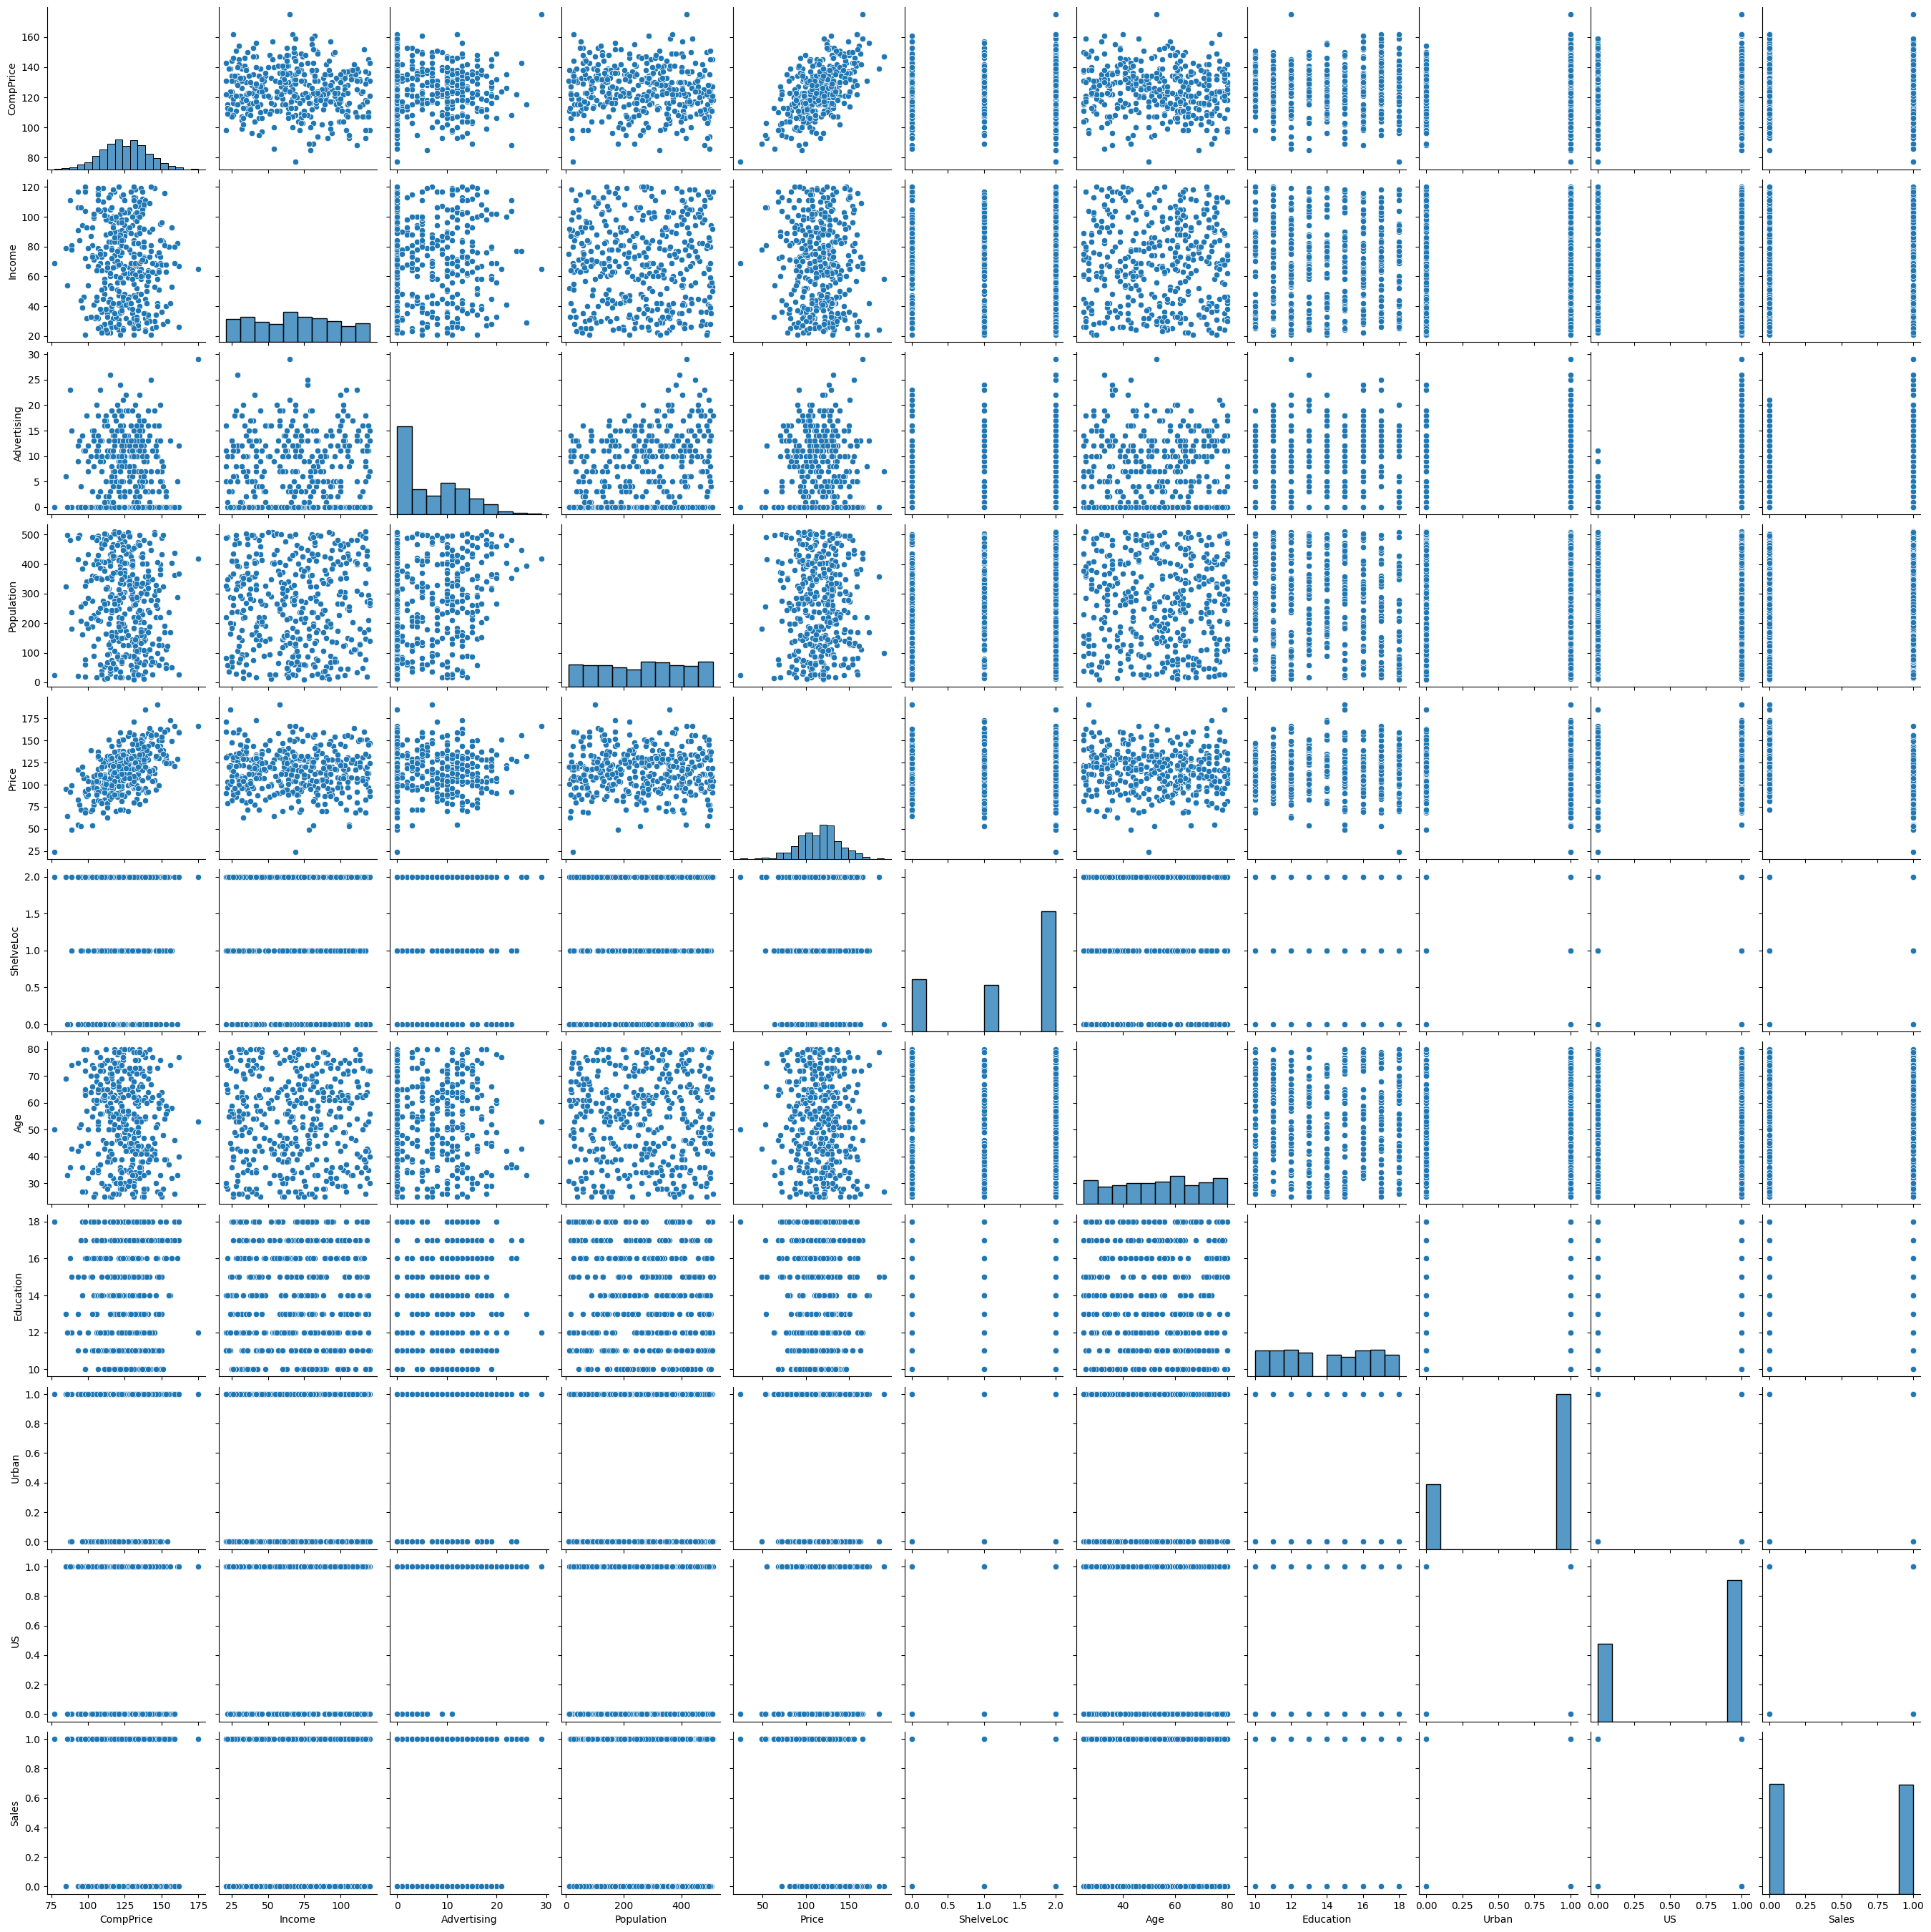

In [22]:
# Visualization
sns.pairplot(Data1)

In [23]:
correlation = Data1.corr()

In [24]:
correlation

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869,0.035578
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601,0.123460
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460,0.251910
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564,0.069327
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861,-0.392275
ShelveLoc,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760,0.106962
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652,-0.186707
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250,-0.028847
Urban,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085,-0.047090
US,0.016869,0.089601,0.684460,0.060564,0.057861,-0.039760,0.008652,-0.078250,0.047085,1.000000,0.142579


<Axes: >

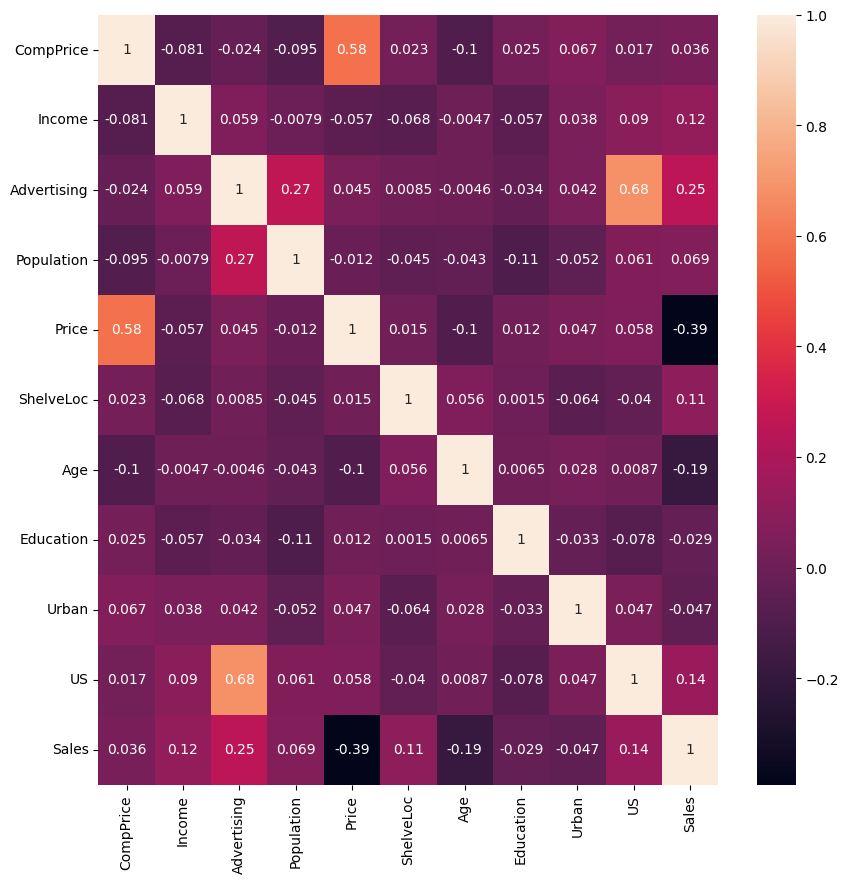

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)

<Axes: >

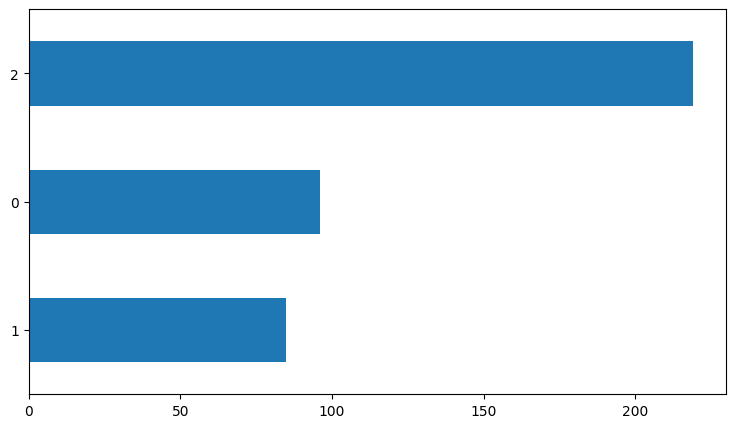

In [26]:
Data1["ShelveLoc"].value_counts(ascending=True).plot(kind='barh')

# Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [28]:
x = Data1.iloc[:,:-1]
y = Data1['Sales']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=21)

In [30]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
145,144,63,11,27,117,2,47,17,1,1
216,141,33,0,243,144,2,34,17,1,0
377,132,61,0,263,125,2,41,12,0,0
176,138,107,9,480,154,2,47,11,0,1
91,97,46,11,267,107,2,80,15,1,1
...,...,...,...,...,...,...,...,...,...,...
368,109,22,10,348,79,1,74,14,0,1
48,116,52,0,349,98,0,69,18,1,0
260,129,117,8,400,101,0,36,10,1,1
312,137,117,5,337,135,0,38,10,1,1


In [31]:
model=RandomForestClassifier()

In [32]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
ypred=model.predict(x_test)

In [34]:
model=RandomForestClassifier(criterion='entropy',n_estimators=27,random_state=14,max_depth=6)

In [35]:
model.fit(x_train,y_train)
ypred = model.predict(x_test)

In [36]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        58
           1       0.83      0.81      0.82        42

    accuracy                           0.85       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.85      0.85      0.85       100



In [37]:
print("Training Accuracy:", model.score(x_train,y_train))
print("Testing Accuracy:" ,model.score(x_test,y_test))

Training Accuracy: 0.9666666666666667
Testing Accuracy: 0.85


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [39]:
print("Training r-sq is: %.2f"% model.score(x_train,y_train))

Training r-sq is: 0.97


In [40]:
# Prediction on traing dataset
ytrainpred=model.predict(x_train)

In [41]:
print("The MAE is : %.2f"% mean_absolute_error(y_train,ytrainpred))
print("The MSE is : %.2f"% mean_squared_error(y_train,ytrainpred))
print("The RMSE is : %.2f"% np.sqrt(mean_squared_error(y_train,ytrainpred)))
print("The EVS is : %.2f"% explained_variance_score(y_train,ytrainpred))

The MAE is : 0.03
The MSE is : 0.03
The RMSE is : 0.18
The EVS is : 0.87


In [42]:
# Prediction on Testing Dataset
ytestpred=model.predict(x_test)

In [43]:
print("The testing r-sq is : %.2f"% r2_score(y_test,ytestpred))
print("The MAE is : %.2f"% mean_absolute_error(y_test,ytestpred))
print("The MSE is : %.2f"% mean_squared_error(y_test,ytestpred))
print("The RMSE is : %.2f"% np.sqrt(mean_squared_error(y_test,ytestpred)))
print("The EVS is : %.2f"% explained_variance_score(y_test,ytestpred))

The testing r-sq is : 0.38
The MAE is : 0.15
The MSE is : 0.15
The RMSE is : 0.39
The EVS is : 0.38


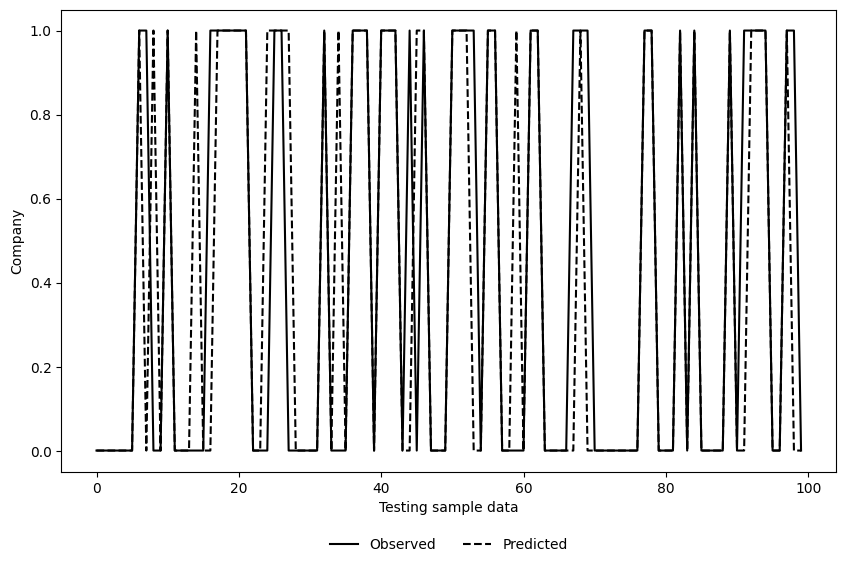

In [44]:
# Plotting the Observed and Predicted Data
plt.rcParams["figure.figsize"]=(10,6)
x_ax=range(len(x_test))
# Plotting
plt.plot(x_ax,y_test,label="Observed", color= "k",linestyle= "-")
plt.plot(x_ax,ytestpred,label="Predicted",color="k",linestyle="--")
plt.ylabel("Company")
plt.xlabel("Testing sample data")
plt.legend(bbox_to_anchor=(0.5,-0.2),loc='lower center',ncol=2,frameon=False)
plt.show()

# K Fold

# Training model cv

In [45]:
from sklearn.model_selection import cross_val_score
score_train=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [46]:
score_train

array([-0.13333333, -0.23333333, -0.1       , -0.06666667, -0.2       ,
       -0.36666667, -0.2       , -0.1       , -0.3       , -0.3       ])

In [47]:
from numpy import absolute
print(absolute(np.mean(score_train)))

0.2


# Testing model cv

In [48]:
score_test=cross_val_score(model,x_test,y_test,scoring='neg_mean_squared_error',cv=10)

In [49]:
score_test

array([-0.2, -0.4, -0.5, -0.5, -0.2, -0.2, -0.4, -0.1, -0.2, -0.4])

In [50]:
print(absolute(np.mean(score_test)))

0.31


# Training data accuracy is 96%
# Testing  data accuracy is 85%

In [51]:
model.feature_importances_

array([0.11880613, 0.10637804, 0.10833557, 0.06553852, 0.2799094 ,
       0.13603468, 0.11189751, 0.04392042, 0.02119536, 0.00798437])

In [52]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [53]:
fi

,feature,importance
4,Price,0.279909
5,ShelveLoc,0.136035
0,CompPrice,0.118806
6,Age,0.111898
2,Advertising,0.108336
1,Income,0.106378
3,Population,0.065539
7,Education,0.043920
8,Urban,0.021195
9,US,0.007984


# Price is most important feature

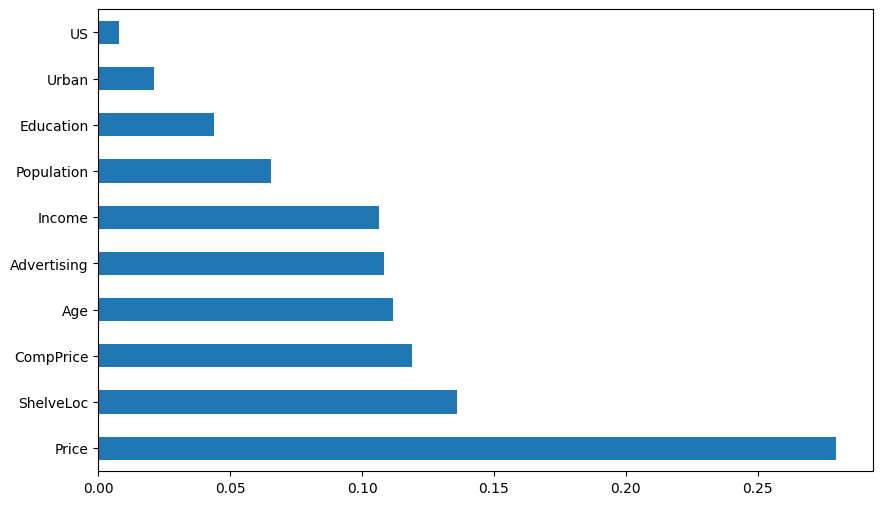

In [54]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()